In [163]:
from rdflib import Graph
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
import networkx as nx
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
g = Graph()
g.parse("gnd.ttl")

<Graph identifier=Nf2b1c382b09b41988e5f61e52d8a5d95 (<class 'rdflib.graph.Graph'>)>

In [3]:
dg = rdflib_to_networkx_digraph(g)

In [ ]:
skos_concept = rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#Concept')
dg.remove_node(skos_concept)


alt = rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#altLabel')
pref = rdflib.term.URIRef("http://www.w3.org/2004/02/skos/core#prefLabel")
hidden = rdflib.term.URIRef("http://www.w3.org/2004/02/skos/core#hiddenLabel")

delete = []
for (head, tail), value in dg.edges.items():
    triple = value["triples"][0]
    relation_type = triple[1]

    if relation_type == alt:
        if "alt" not in dg.nodes[head]:
            dg.nodes[head]["alt"] = set()
        dg.nodes[head]["alt"].add(str(tail))
        delete.append(tail)
    if relation_type == pref:
        if "pref" not in dg.nodes[head]:
            dg.nodes[head]["pref"] = set()
        dg.nodes[head]["pref"].add(str(tail))
        delete.append(tail)
    if relation_type == hidden:
        if "hidden" not in dg.nodes[head]:
            dg.nodes[head]["hidden"] = set()
        dg.nodes[head]["hidden"].add(str(tail))
        delete.append(tail)

dg.remove_nodes_from(delete)

In [4]:
dg.number_of_edges(), dg.number_of_nodes(), nx.density(dg)

1143686

In [70]:
hist = nx.degree_histogram(dg)

In [63]:
weak_conn = len(list(nx.weakly_connected_components(dg)))
strong_conn = len(list(nx.strongly_connected_components(dg)))

In [64]:
print(weak_conn, strong_conn)

27839 251775


In [78]:
weak_comp = nx.strongly_connected_components(dg)

In [98]:
def get_edge_relation(node_i, node_j):
    triples = dg[node_i][node_j]["triples"]
    rel = triples[0][1]
    return str(rel).split("#")[-1]

In [ ]:
dg.nodes

In [169]:
coli = rdflib.term.URIRef('http://d-nb.info/gnd/040358437')
ml = rdflib.term.URIRef('http://d-nb.info/gnd/041937546')
ling = rdflib.term.URIRef('http://d-nb.info/gnd/040742504')

print(dg.nodes[ling])
for n in nx.neighbors(dg, coli):
    
    rel_type = get_edge_relation(coli, n)
    name = " ".join(dg.nodes[n].get("pref"))
    print(f"1 Hop: Relation {rel_type} with '{name}'")


    for m in nx.neighbors(dg, n):
        rel_type = get_edge_relation(n, m)
        name = " ".join(dg.nodes[m].get("pref"))
        print(f"2 Hop: Relation {rel_type} with '{name}'")

{'pref': {'Linguistik'}, 'alt': {'Allgemeine Linguistik', 'Allgemeine Sprachwissenschaft', 'Sprachwissenschaft', 'Sprachforschung'}}
1 Hop: Relation related with 'Linguistische Informationswissenschaft'
2 Hop: Relation related with 'Mathematische Linguistik'
2 Hop: Relation related with 'Computerlinguistik'
1 Hop: Relation broader with 'Linguistik'
2 Hop: Relation broader with 'Philologie'


In [180]:
rel_counter = {}
for head, tail in dg.edges():
    rt = get_edge_relation(head, tail)
    if rt not in rel_counter:
        rel_counter[rt] = 0
    rel_counter[rt] += 1
    if rel_type == "related":
        assert tail in dg[head]

In [178]:
rel_counter["related"] / dg.number_of_edges() , rel_counter["broader"] / dg.number_of_edges()

(0.7321649252892933, 0.26783507471070667)

(rdflib.term.URIRef('http://d-nb.info/gnd/040533093'), 4600)

In [185]:
out_degree = dg.out_degree()
sort_deg = sorted(out_degree, key=lambda x: x[1], reverse=True)
for ent, count in sort_deg[:10]:
    print(dg.nodes[ent].get("pref"), count)

{'Kinder- und Hausmärchen'} 136
{'Goethe, Johann Wolfgang von : Die Leiden des jungen Werthers'} 68
{'Goethe, Johann Wolfgang von : Faust'} 54
{'Mendelssohn Bartholdy, Felix (1809-1847)'} 47
{'Schumann, Clara (1819-1896)'} 41
{'Busch, Wilhelm : Max und Moritz'} 40
{'Hänsel und Gretel'} 38
{'Schneewittchen'} 38
{'Einstein, Albert (1879-1955)'} 36
{'Bülow, Hans von (1830-1894)'} 36


In [193]:
t = dg[sort_deg[0][0]]
for k in t:
    pref = dg.nodes[k].get("pref")
    print(pref)

None
None
{'Das Wasser des Lebens'}
None
None
None
None
{'Brüderchen und Schwesterchen'}
None
None
{'Runge, Philipp Otto (1777-1810)'}
None
{'Dornröschen'}
{'Hänsel und Gretel'}
None
{'Viehmann, Dorothea (1755-1815)'}
None
None
{'Die kluge Else'}
None
None
None
None
None
None
{'Volksliteratur'}
None
{'Gevatter Tod'}
None
{'Basile, Giambattista : Il Pentamerone'}
None
None
None
None
None
None
None
None
{'Marienkind'}
None
None
{'Die Bremer Stadtmusikanten'}
None
None
{'Strohhalm, Kohle und Bohne'}
{'Rapunzel'}
{'Des Knaben Wunderhorn'}
{'Die zwei Brüder'}
{'Der gestiefelte Kater'}
None
{'Rotkäppchen'}
None
None
None
None
None
None
None
None
{'Grimm, Wilhelm (1786-1859)'}
{'Frau Holle (Märchen)'}
None
None
None
{'Die zwölf Brüder'}
None
None
None
None
{'Brentano, Clemens (1778-1842)'}
None
None
None
None
{'Von dem Machandelboom'}
None
None
{'Die sieben Raben'}
None
None
None
{'Fundevogel'}
None
None
None
{'Von dem Fischer un syner Fru'}
{'Bechstein, Ludwig : Deutsches Märchenbuc

In [115]:
out_no_nodes = list(sorted(out_degree, key=lambda x: x[1]))
out_no_nodes = [n for n, i in out_no_nodes if i == 0]

In [118]:
len(out_no_nodes)

93198

In [182]:
in_degree = dg.in_degree()
sort_deg = sorted(in_degree, key=lambda x: x[1], reverse=True)
for ent, count in sort_deg[:10]:
    print(dg.nodes[ent].get("pref"), count)

{'Berlin'} 6043
{'Schriftsteller'} 4600
{'Deutschland'} 4508
{'Maler'} 3760
{'Motiv'} 3631
{'Künstler'} 3259
{'Wien'} 2959
{'Bayern'} 2886
{'München'} 2823
{'Nordrhein-Westfalen'} 2668


In [120]:
in_no_nodes = list(sorted(in_degree, key=lambda x: x[1]))
in_no_nodes = [n for n, i in in_no_nodes if i == 0]
print(len(in_no_nodes))

146450


In [121]:
in_no_nodes = set(in_no_nodes)
out_no_nodes = set(out_no_nodes)

intersect = in_no_nodes.intersection(out_no_nodes)

In [127]:
print(dg.number_of_edges(), dg.number_of_nodes())

480654 268284


In [125]:
c = 0
for i in intersect:
    if c > 100:
        break
    c += 1
    print(i)
    print(dg.nodes[i].get("pref"))

http://d-nb.info/gnd/953421368
{'Lauter'}
http://d-nb.info/gnd/041703553
{'Mohn'}
http://d-nb.info/gnd/042526760
{'Füllmenbacher Hofberg'}
http://d-nb.info/gnd/118713213
{'Joss, Anna (1882-1973)'}
http://d-nb.info/gnd/042013712
{'Turbulente Flüsse'}
http://d-nb.info/gnd/129586919
{'Doushe, Jigme'}
http://d-nb.info/gnd/041812077
{'Siebung (Mathematik)'}
http://d-nb.info/gnd/1169328709
{'Bizepssehnenreflex'}
http://d-nb.info/gnd/041192389
{'Zermatt (Region)'}
http://d-nb.info/gnd/042384168
{'Grasse (Region)'}
http://d-nb.info/gnd/942489861
{'Palladiumhalogenide'}
http://d-nb.info/gnd/123188180
{'Stechow, Arnim von (1941)'}
http://d-nb.info/gnd/940066831
{'Stochastische Ordnung'}
http://d-nb.info/gnd/041623096
{'Ionendichte'}
http://d-nb.info/gnd/979638844
{'Die Büchse der Pandora (Film)'}
http://d-nb.info/gnd/94382298X
{'Deckenpfronn'}
http://d-nb.info/gnd/967630037
{'Identifizierbarkeit'}
http://d-nb.info/gnd/942374010
{'Douz'}
http://d-nb.info/gnd/949635782
{'Sulfolipide'}
http://d-

In [68]:
clustering = nx.average_clustering(dg)

In [69]:
clustering

0.028360939201672743

In [131]:
out_degree = list(out_degree)
print(out_degree[:2])

[(rdflib.term.URIRef('http://d-nb.info/gnd/119071401'), 4), (rdflib.term.URIRef('http://d-nb.info/gnd/115807381'), 3)]


In [134]:
counts = [c for n, c in out_degree]
print(counts[:10])

[4, 3, 5, 4, 5, 0, 6, 14, 1, 2]


In [137]:
hist = nx.degree_histogram(dg)

In [152]:
print(hist[:100])

[20824, 111022, 40334, 30147, 19687, 13334, 8549, 5733, 3973, 2835, 2030, 1596, 1147, 962, 738, 627, 521, 433, 340, 281, 246, 177, 190, 183, 141, 112, 116, 118, 76, 80, 71, 56, 54, 52, 50, 49, 45, 53, 54, 29, 45, 34, 30, 24, 22, 28, 28, 29, 19, 27, 28, 18, 19, 17, 13, 20, 18, 19, 12, 11, 11, 9, 12, 18, 7, 13, 10, 11, 12, 10, 6, 11, 11, 8, 5, 9, 6, 6, 10, 7, 10, 9, 6, 8, 10, 9, 5, 4, 6, 8, 6, 8, 4, 7, 2, 6, 4, 3, 5, 4]


In [160]:
cut_off = 10
hist_cut = hist[:cut_off] + [sum(hist[cut_off:])]
x_cut = list(range(len(hist)))[:cut_off] + [f">={cut_off}"]

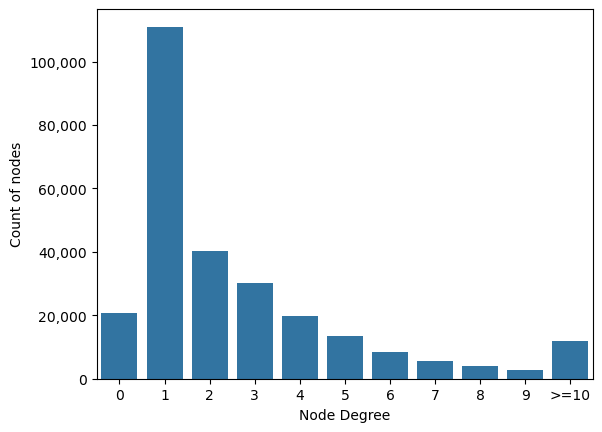

In [164]:
ax = sns.barplot(
    x = x_cut,
    y = hist_cut
)

ax.set(ylabel='Count of nodes', xlabel='Node Degree')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()